In [ ]:
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [ ]:

# Load the dataset

df = pd.read_csv("C:/Users/Phoni/Downloads/archive (1)/netflix_titles.csv")

In [ ]:
df

show_id     type                  title         director  \
0         s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1         s2  TV Show          Blood & Water              NaN   
2         s3  TV Show              Ganglands  Julien Leclercq   
3         s4  TV Show  Jailbirds New Orleans              NaN   
4         s5  TV Show           Kota Factory              NaN   
...      ...      ...                    ...              ...   
8802   s8803    Movie                 Zodiac    David Fincher   
8803   s8804  TV Show            Zombie Dumb              NaN   
8804   s8805    Movie             Zombieland  Ruben Fleischer   
8805   s8806    Movie                   Zoom     Peter Hewitt   
8806   s8807    Movie                 Zubaan      Mozez Singh   

                                                   cast        country  \
0                                                   NaN  United States   
1     Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2     Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                   NaN            NaN   
4     Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   
...                                                 ...            ...   
8802  Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...  United States   
8803                                                NaN            NaN   
8804  Jesse Eisenberg, Woody Harrelson, Emma Stone, ...  United States   
8805  Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...  United States   
8806  Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...          India   

              date_added  release_year rating   duration  \
0     September 25, 2021          2020  PG-13     90 min   
1     September 24, 2021          2021  TV-MA  2 Seasons   
2     September 24, 2021          2021  TV-MA   1 Season   
3     September 24, 2021          2021  TV-MA   1 Season   
4     September 24, 2021          2021  TV-MA  2 Seasons   
...                  ...           ...    ...        ...   
8802   November 20, 2019          2007      R    158 min   
8803        July 1, 2019          2018  TV-Y7  2 Seasons   
8804    November 1, 2019          2009      R     88 min   
8805    January 11, 2020          2006     PG     88 min   
8806       March 2, 2019          2015  TV-14    111 min   

                                              listed_in  \
0                                         Documentaries   
1       International TV Shows, TV Dramas, TV Mysteries   
2     Crime TV Shows, International TV Shows, TV Act...   
3                                Docuseries, Reality TV   
4     International TV Shows, Romantic TV Shows, TV ...   
...                                                 ...   
8802                     Cult Movies, Dramas, Thrillers   
8803             Kids' TV, Korean TV Shows, TV Comedies   
8804                            Comedies, Horror Movies   
8805                 Children & Family Movies, Comedies   
8806     Dramas, International Movies, Music & Musicals   

                                            description  
0     As her father nears the end of his life, filmm...  
1     After crossing paths at a party, a Cape Town t...  
2     To protect his family from a powerful drug lor...  
3     Feuds, flirtations and toilet talk go down amo...  
4     In a city of coaching centers known to train I...  
...                                                 ...  
8802  A political cartoonist, a crime reporter and a...  
8803  While living alone in a spooky town, a young g...  
8804  Looking to survive in a world taken over by zo...  
8805  Dragged from civilian life, a former superhero...  
8806  A scrappy but poor boy worms his way into a ty...  

[8807 rows x 12 columns]

In [ ]:
df.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [ ]:
# Remove null values in place
df.dropna(inplace=True)


In [ ]:
df.dtypes

show_id                   object
type                      object
title                     object
director                  object
cast                      object
country                   object
date_added                object
release_year               int64
rating                    object
duration                  object
listed_in                 object
description               object
sentiment                float64
sentiment_label           object
processed_description     object
topic                      int64
dtype: object

In [ ]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [ ]:
df

show_id     type                          title             director  \
7         s8    Movie                        Sankofa         Haile Gerima   
8         s9  TV Show  The Great British Baking Show      Andy Devonshire   
9        s10    Movie                   The Starling       Theodore Melfi   
12       s13    Movie                   Je Suis Karl  Christian Schwochow   
24       s25    Movie                          Jeans           S. Shankar   
...      ...      ...                            ...                  ...   
8801   s8802    Movie                        Zinzana      Majid Al Ansari   
8802   s8803    Movie                         Zodiac        David Fincher   
8804   s8805    Movie                     Zombieland      Ruben Fleischer   
8805   s8806    Movie                           Zoom         Peter Hewitt   
8806   s8807    Movie                         Zubaan          Mozez Singh   

                                                   cast  \
7     Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...   
8     Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...   
9     Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...   
12    Luna Wedler, Jannis Niewöhner, Milan Peschel, ...   
24    Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...   
...                                                 ...   
8801  Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...   
8802  Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...   
8804  Jesse Eisenberg, Woody Harrelson, Emma Stone, ...   
8805  Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...   
8806  Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...   

                                                country          date_added  \
7     United States, Ghana, Burkina Faso, United Kin...  September 24, 2021   
8                                        United Kingdom  September 24, 2021   
9                                         United States  September 24, 2021   
12                              Germany, Czech Republic  September 23, 2021   
24                                                India  September 21, 2021   
...                                                 ...                 ...   
8801                       United Arab Emirates, Jordan       March 9, 2016   
8802                                      United States   November 20, 2019   
8804                                      United States    November 1, 2019   
8805                                      United States    January 11, 2020   
8806                                              India       March 2, 2019   

      release_year rating   duration  \
7             1993  TV-MA    125 min   
8             2021  TV-14  9 Seasons   
9             2021  PG-13    104 min   
12            2021  TV-MA    127 min   
24            1998  TV-14    166 min   
...            ...    ...        ...   
8801          2015  TV-MA     96 min   
8802          2007      R    158 min   
8804          2009      R     88 min   
8805          2006     PG     88 min   
8806          2015  TV-14    111 min   

                                             listed_in  \
7     Dramas, Independent Movies, International Movies   
8                         British TV Shows, Reality TV   
9                                     Comedies, Dramas   
12                        Dramas, International Movies   
24     Comedies, International Movies, Romantic Movies   
...                                                ...   
8801           Dramas, International Movies, Thrillers   
8802                    Cult Movies, Dramas, Thrillers   
8804                           Comedies, Horror Movies   
8805                Children & Family Movies, Comedies   
8806    Dramas, International Movies, Music & Musicals   

                                            description  
7     On a photo shoot in Ghana, an American model s...  
8     A talented batch of amateur bakers face off in...  
9     A woman adjusting to life after a loss contend...  
12    After 

In [ ]:

# Instantiate the VADER sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Perform sentiment analysis on the 'description' column
df['sentiment'] = df['description'].apply(lambda x: sid.polarity_scores(x)['compound'])

# Classify sentiments based on the compound score
df['sentiment_label'] = df['sentiment'].apply(lambda x: 'Positive' if x >= 0.05 else ('Negative' if x <= -0.05 else 'Neutral'))

# Display the results
print(df[['title', 'description', 'sentiment_label']])

                              title  \
7                           Sankofa   
8     The Great British Baking Show   
9                      The Starling   
12                     Je Suis Karl   
24                            Jeans   
...                             ...   
8801                        Zinzana   
8802                         Zodiac   
8804                     Zombieland   
8805                           Zoom   
8806                         Zubaan   

                                            description sentiment_label  
7     On a photo shoot in Ghana, an American model s...        Negative  
8     A talented batch of amateur bakers face off in...        Positive  
9     A woman adjusting to life after a loss contend...        Negative  
12    After most of her family is murdered in a terr...        Negative  
24    When the father of the man she loves insists t...        Positive  
...                                                 ...             ...  
8801  Recover

Average Sentiment Score: -0.03


c:\Users\Phoni\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Phoni\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Phoni\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


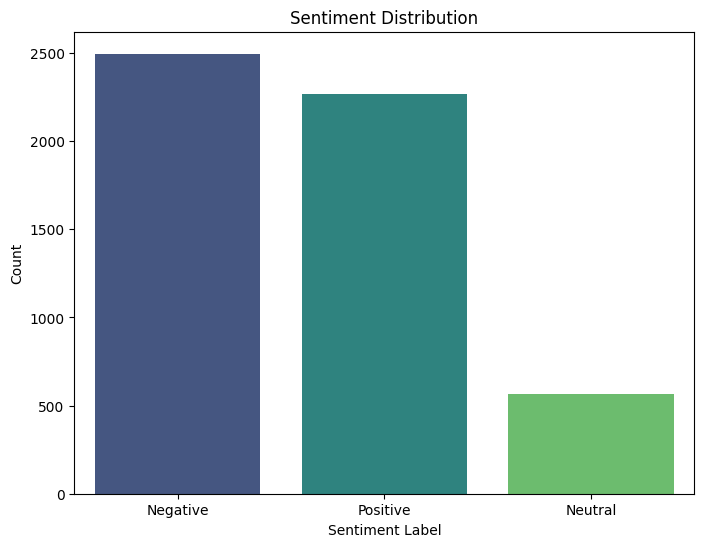

In [ ]:

# Calculate and print the average sentiment score
average_sentiment_score = df['sentiment'].mean()
print(f"Average Sentiment Score: {average_sentiment_score:.2f}")

# Create a visualization (e.g., bar chart) for sentiment distribution
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.countplot(x='sentiment_label', data=df, palette='viridis')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment Label')
plt.ylabel('Count')
plt.show()


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from nltk.corpus import stopwords
import nltk
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Phoni\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.sentiment import SentimentIntensityAnalyzer

In [ ]:

# Topic Modeling
# Text Preprocessing
stop_words = set(stopwords.words('english'))
df['processed_description'] = df['listed_in'].apply(lambda x: ' '.join([word.lower() for word in word_tokenize(x) if word.isalpha() and word.lower() not in stop_words]))

# TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_features=1000)
X = vectorizer.fit_transform(df['processed_description'])

# Topic Modeling (LDA)
lda = LatentDirichletAllocation(n_components=5, random_state=42)
topics = lda.fit_transform(X)

# Assign the topics to the DataFrame
df['topic'] = topics.argmax(axis=1)

In [ ]:
df

show_id     type                          title             director  \
7         s8    Movie                        Sankofa         Haile Gerima   
8         s9  TV Show  The Great British Baking Show      Andy Devonshire   
9        s10    Movie                   The Starling       Theodore Melfi   
12       s13    Movie                   Je Suis Karl  Christian Schwochow   
24       s25    Movie                          Jeans           S. Shankar   
...      ...      ...                            ...                  ...   
8801   s8802    Movie                        Zinzana      Majid Al Ansari   
8802   s8803    Movie                         Zodiac        David Fincher   
8804   s8805    Movie                     Zombieland      Ruben Fleischer   
8805   s8806    Movie                           Zoom         Peter Hewitt   
8806   s8807    Movie                         Zubaan          Mozez Singh   

                                                   cast  \
7     Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...   
8     Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...   
9     Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...   
12    Luna Wedler, Jannis Niewöhner, Milan Peschel, ...   
24    Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...   
...                                                 ...   
8801  Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...   
8802  Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...   
8804  Jesse Eisenberg, Woody Harrelson, Emma Stone, ...   
8805  Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...   
8806  Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...   

                                                country          date_added  \
7     United States, Ghana, Burkina Faso, United Kin...  September 24, 2021   
8                                        United Kingdom  September 24, 2021   
9                                         United States  September 24, 2021   
12                              Germany, Czech Republic  September 23, 2021   
24                                                India  September 21, 2021   
...                                                 ...                 ...   
8801                       United Arab Emirates, Jordan       March 9, 2016   
8802                                      United States   November 20, 2019   
8804                                      United States    November 1, 2019   
8805                                      United States    January 11, 2020   
8806                                              India       March 2, 2019   

      release_year rating   duration  \
7             1993  TV-MA    125 min   
8             2021  TV-14  9 Seasons   
9             2021  PG-13    104 min   
12            2021  TV-MA    127 min   
24            1998  TV-14    166 min   
...            ...    ...        ...   
8801          2015  TV-MA     96 min   
8802          2007      R    158 min   
8804          2009      R     88 min   
8805          2006     PG     88 min   
8806          2015  TV-14    111 min   

                                             listed_in  \
7     Dramas, Independent Movies, International Movies   
8                         British TV Shows, Reality TV   
9                                     Comedies, Dramas   
12                        Dramas, International Movies   
24     Comedies, International Movies, Romantic Movies   
...                                                ...   
8801           Dramas, International Movies, Thrillers   
8802                    Cult Movies, Dramas, Thrillers   
8804                           Comedies, Horror Movies   
8805                Children & Family Movies, Comedies   
8806    Dramas, International Movies, Music & Musicals   

                                            description  sentiment  \
7     On a photo shoot in Ghana, an American model s...    -0.7845   
8     A talented batch of amateur bakers face off in...     0.9382   
9     A woman adjusting to life af

In [ ]:
df['rating'].unique()

array(['TV-MA', 'TV-14', 'PG-13', 'PG', 'R', 'TV-PG', 'G', 'TV-Y7',
       'TV-G', 'TV-Y', 'NC-17', 'NR', 'TV-Y7-FV', 'UR'], dtype=object)

c:\Users\Phoni\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Phoni\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Phoni\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


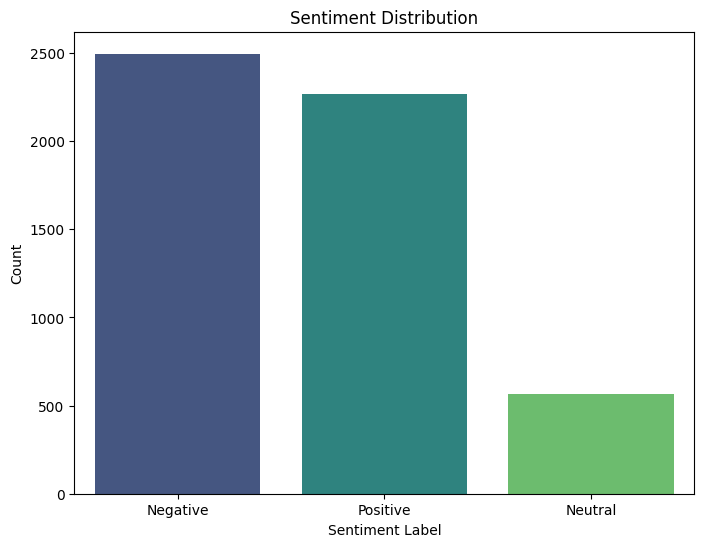

c:\Users\Phoni\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Phoni\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Phoni\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


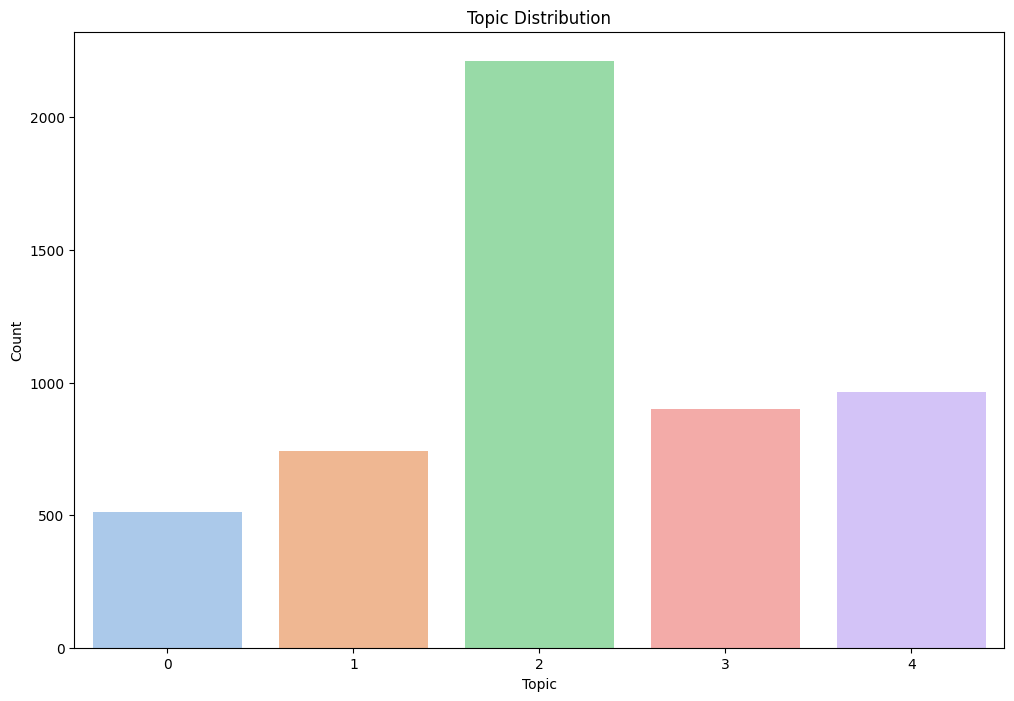

c:\Users\Phoni\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Phoni\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Phoni\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Phoni\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is

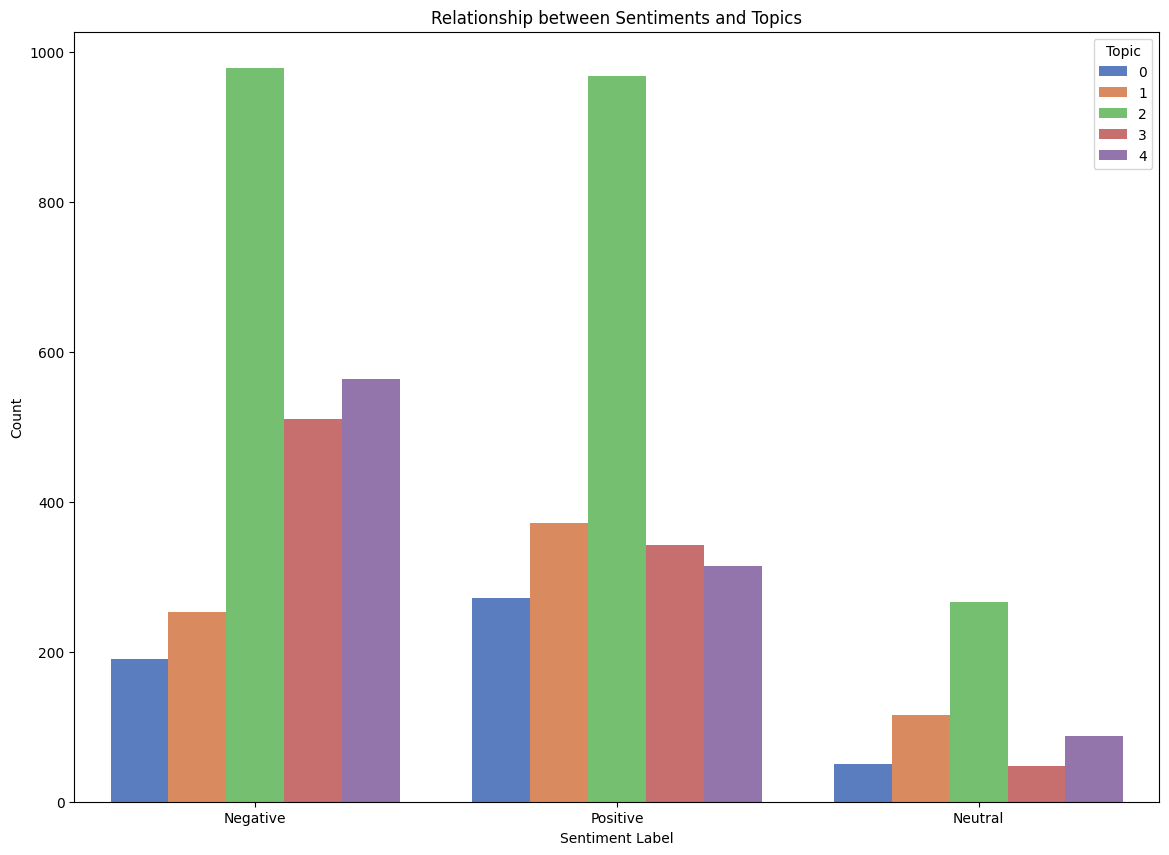

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualization for Sentiment Analysis
plt.figure(figsize=(8, 6))
sns.countplot(x='sentiment_label', data=df, palette='viridis')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment Label')
plt.ylabel('Count')
plt.show()

# Visualization for Topic Modeling
plt.figure(figsize=(12, 8))
sns.countplot(x='topic', data=df, palette='pastel')
plt.title('Topic Distribution')
plt.xlabel('Topic')
plt.ylabel('Count')
plt.show()

# Relationship Visualization
plt.figure(figsize=(14, 10))
sns.countplot(x='sentiment_label', hue='topic', data=df, palette='muted')
plt.title('Relationship between Sentiments and Topics')
plt.xlabel('Sentiment Label')
plt.ylabel('Count')
plt.legend(title='Topic', loc='upper right')
plt.show()


In [ ]:
from gensim import corpora, models
from pprint import pprint

# Create a dictionary representation of the documents
dictionary = corpora.Dictionary(df['processed_description'].apply(str.split))

# Create a document-term matrix
corpus = [dictionary.doc2bow(text) for text in df['processed_description'].apply(str.split)]

# Apply LDA model
lda_model = models.LdaModel(corpus, num_topics=5, id2word=dictionary, passes=15, random_state=42)

# Print the topics and associated words
topics = lda_model.print_topics(num_words=10)
for topic in topics:
    print(f"Topic {topic[0]}: {topic[1]}")


Topic 0: 0.318*"movies" + 0.247*"dramas" + 0.177*"international" + 0.096*"independent" + 0.068*"thrillers" + 0.060*"comedies" + 0.021*"sports" + 0.011*"lgbtq" + 0.002*"classic" + 0.000*"horror"
Topic 1: 0.308*"movies" + 0.177*"international" + 0.145*"comedies" + 0.140*"romantic" + 0.079*"dramas" + 0.068*"tv" + 0.042*"shows" + 0.016*"classic" + 0.008*"crime" + 0.006*"british"
Topic 2: 0.301*"movies" + 0.134*"family" + 0.134*"children" + 0.100*"horror" + 0.096*"comedies" + 0.077*"musicals" + 0.077*"music" + 0.051*"international" + 0.023*"cult" + 0.007*"classic"
Topic 3: 0.380*"adventure" + 0.380*"action" + 0.118*"fantasy" + 0.047*"comedies" + 0.023*"features" + 0.023*"anime" + 0.010*"classic" + 0.007*"movies" + 0.006*"kids" + 0.003*"international"
Topic 4: 0.511*"documentaries" + 0.300*"comedy" + 0.079*"spirituality" + 0.079*"faith" + 0.018*"docuseries" + 0.002*"science" + 0.002*"nature" + 0.000*"sports" + 0.000*"talk" + 0.000*"lgbtq"


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import numpy as np

# Helper function to print the top words for each topic
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        top_words_idx = topic.argsort()[:-no_top_words - 1:-1]
        top_words = [feature_names[i] for i in top_words_idx]
        print(f"Topic #{topic_idx}: {', '.join(top_words)}")

# Vectorize the text using CountVectorizer
vectorizer = CountVectorizer(max_features=1000)
X = vectorizer.fit_transform(df['processed_description'])

# Fit LDA model
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(X)

# Get feature names (words)
feature_names = np.array(vectorizer.get_feature_names_out())

# Display the topics
display_topics(lda, feature_names, no_top_words=10)


Topic #0: movies, family, children, comedies, classic, dramas, sports, fantasy, cult, spirituality
Topic #1: documentaries, movies, music, musicals, international, sports, comedies, cult, anime, features
Topic #2: movies, dramas, comedies, international, independent, romantic, lgbtq, fantasy, horror, sports
Topic #3: movies, dramas, international, thrillers, horror, comedy, fantasy, faith, spirituality, sports
Topic #4: action, adventure, tv, international, shows, movies, fantasy, dramas, comedies, crime


In [ ]:
import pandas as pd

# Function to display topics
def display_topics_as_dataframe(model, feature_names, no_top_words):
    topics_data = []
    for topic_idx, topic in enumerate(model.components_):
        top_words_idx = topic.argsort()[:-no_top_words - 1:-1]
        top_words = [feature_names[i] for i in top_words_idx]
        topics_data.append({'Topic': f'Topic #{topic_idx + 1}', 'Top Words': ', '.join(top_words)})
    return pd.DataFrame(topics_data)

# Call the function to display topics as a DataFrame
topics_dataframe = display_topics_as_dataframe(lda, feature_names, no_top_words=10)

# Print the DataFrame
print(topics_dataframe)


      Topic                                          Top Words
0  Topic #1  movies, family, children, comedies, classic, d...
1  Topic #2  documentaries, movies, music, musicals, intern...
2  Topic #3  movies, dramas, comedies, international, indep...
3  Topic #4  movies, dramas, international, thrillers, horr...
4  Topic #5  action, adventure, tv, international, shows, m...


In [ ]:
from ydata_profiling import ProfileReport

In [ ]:
ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'sentiment', 'sentiment_label', 'processed_description', 'topic'],
      dtype='object')

In [ ]:
# Export the DataFrame to a CSV file
topics_dataframe.to_csv('topics_output.csv', index=False)


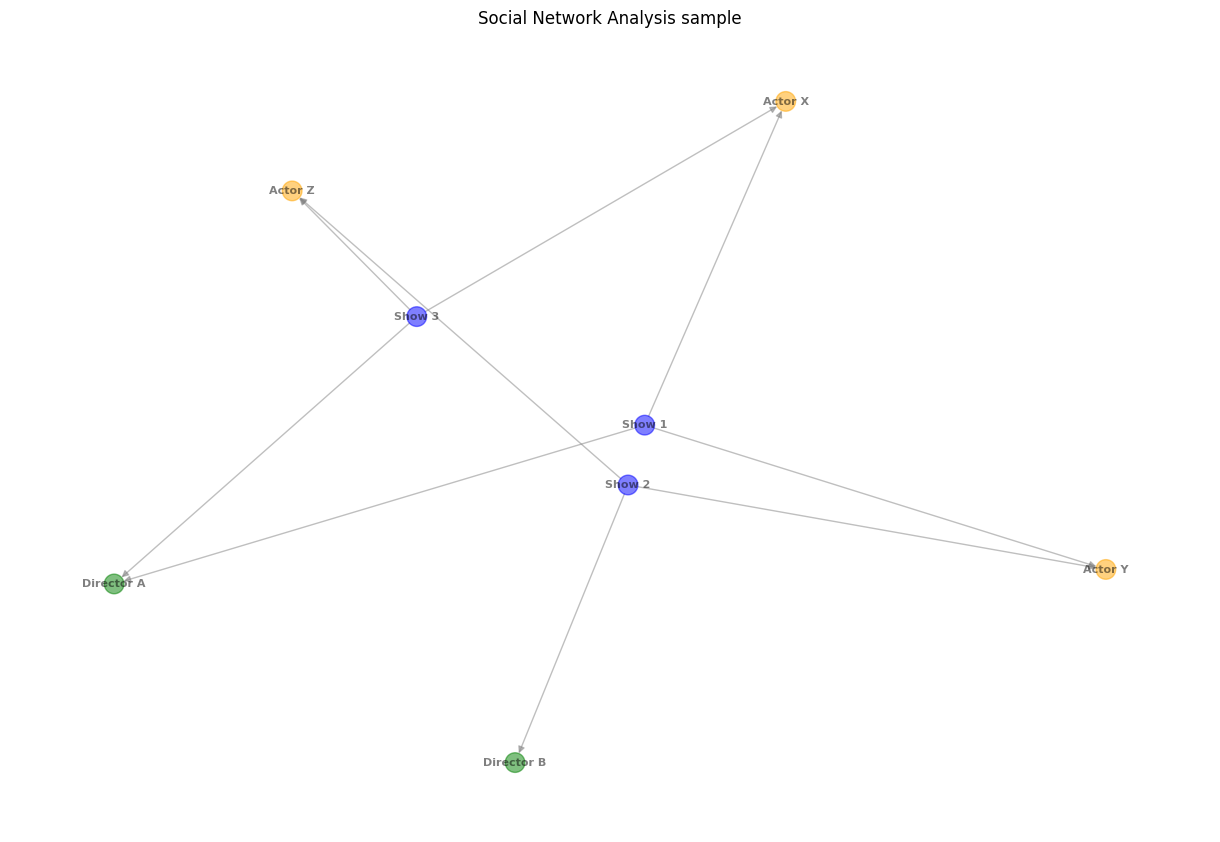

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

# Sample DataFrame
data = {
    'title': ['Show 1', 'Show 2', 'Show 3'],
    'director': ['Director A', 'Director B', 'Director A'],
    'cast': ['Actor X, Actor Y', 'Actor Y, Actor Z', 'Actor X, Actor Z'],
    'topic': [1, 2, 1],
    'rating': [4.5, 3.8, 4.2],
}

df_sample = pd.DataFrame(data)

# Create a multi-edge directed graph
G = nx.MultiDiGraph()

# Add nodes with attributes based on node type
for _, row in df_sample.iterrows():
    G.add_node(row['title'], node_type='Show', topic=row['topic'], rating=row['rating'])
    directors = row['director'].split(', ')
    cast_members = row['cast'].split(', ')

    for director in directors:
        G.add_node(director, node_type='Director')
        G.add_edge(row['title'], director)

    for cast_member in cast_members:
        G.add_node(cast_member.strip(), node_type='Cast Member')
        G.add_edge(row['title'], cast_member.strip())

# Visualize the graph with multiple edges between nodes
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G)

# Define colors for different node types
node_colors = {'Show': 'blue', 'Director': 'green', 'Cast Member': 'orange'}
node_types = [G.nodes[n]['node_type'] for n in G.nodes]
edge_colors = ['gray' for _ in G.edges]

nx.draw(G, pos, with_labels=True, font_size=8, node_size=200, node_color=[node_colors[node_type] for node_type in node_types], font_color='black', font_weight='bold', edge_color=edge_colors, alpha=0.5)
plt.title('Social Network Analysis sample')
plt.show()


In [ ]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'sentiment', 'sentiment_label', 'processed_description', 'topic'],
      dtype='object')

In [ ]:
df

show_id     type                          title             director  \
7         s8    Movie                        Sankofa         Haile Gerima   
8         s9  TV Show  The Great British Baking Show      Andy Devonshire   
9        s10    Movie                   The Starling       Theodore Melfi   
12       s13    Movie                   Je Suis Karl  Christian Schwochow   
24       s25    Movie                          Jeans           S. Shankar   
...      ...      ...                            ...                  ...   
8801   s8802    Movie                        Zinzana      Majid Al Ansari   
8802   s8803    Movie                         Zodiac        David Fincher   
8804   s8805    Movie                     Zombieland      Ruben Fleischer   
8805   s8806    Movie                           Zoom         Peter Hewitt   
8806   s8807    Movie                         Zubaan          Mozez Singh   

                                                   cast  \
7     Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...   
8     Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...   
9     Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...   
12    Luna Wedler, Jannis Niewöhner, Milan Peschel, ...   
24    Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...   
...                                                 ...   
8801  Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...   
8802  Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...   
8804  Jesse Eisenberg, Woody Harrelson, Emma Stone, ...   
8805  Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...   
8806  Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...   

                                                country          date_added  \
7     United States, Ghana, Burkina Faso, United Kin...  September 24, 2021   
8                                        United Kingdom  September 24, 2021   
9                                         United States  September 24, 2021   
12                              Germany, Czech Republic  September 23, 2021   
24                                                India  September 21, 2021   
...                                                 ...                 ...   
8801                       United Arab Emirates, Jordan       March 9, 2016   
8802                                      United States   November 20, 2019   
8804                                      United States    November 1, 2019   
8805                                      United States    January 11, 2020   
8806                                              India       March 2, 2019   

      release_year rating   duration  \
7             1993  TV-MA    125 min   
8             2021  TV-14  9 Seasons   
9             2021  PG-13    104 min   
12            2021  TV-MA    127 min   
24            1998  TV-14    166 min   
...            ...    ...        ...   
8801          2015  TV-MA     96 min   
8802          2007      R    158 min   
8804          2009      R     88 min   
8805          2006     PG     88 min   
8806          2015  TV-14    111 min   

                                             listed_in  \
7     Dramas, Independent Movies, International Movies   
8                         British TV Shows, Reality TV   
9                                     Comedies, Dramas   
12                        Dramas, International Movies   
24     Comedies, International Movies, Romantic Movies   
...                                                ...   
8801           Dramas, International Movies, Thrillers   
8802                    Cult Movies, Dramas, Thrillers   
8804                           Comedies, Horror Movies   
8805                Children & Family Movies, Comedies   
8806    Dramas, International Movies, Music & Musicals   

                                            description  sentiment  \
7     On a photo shoot in Ghana, an American model s...    -0.7845   
8     A talented batch of amateur bakers face off in...     0.9382   
9     A woman adjusting to life af

## According to Topics

Graph Data:
                             Node Node Type
0                         Sankofa      Show
1                    Haile Gerima  Director
2                          Dramas     label
3              Independent Movies     label
4            International Movies     label
5   The Great British Baking Show      Show
6                 Andy Devonshire  Director
7                British TV Shows     label
8                      Reality TV     label
9                    The Starling      Show
10                 Theodore Melfi  Director
11                       Comedies     label
12                   Je Suis Karl      Show
13            Christian Schwochow  Director
14                          Jeans      Show
15                     S. Shankar  Director
16                Romantic Movies     label

Edges Data:
                           Source                Target
0                         Sankofa          Haile Gerima
1                         Sankofa                Dramas
2              

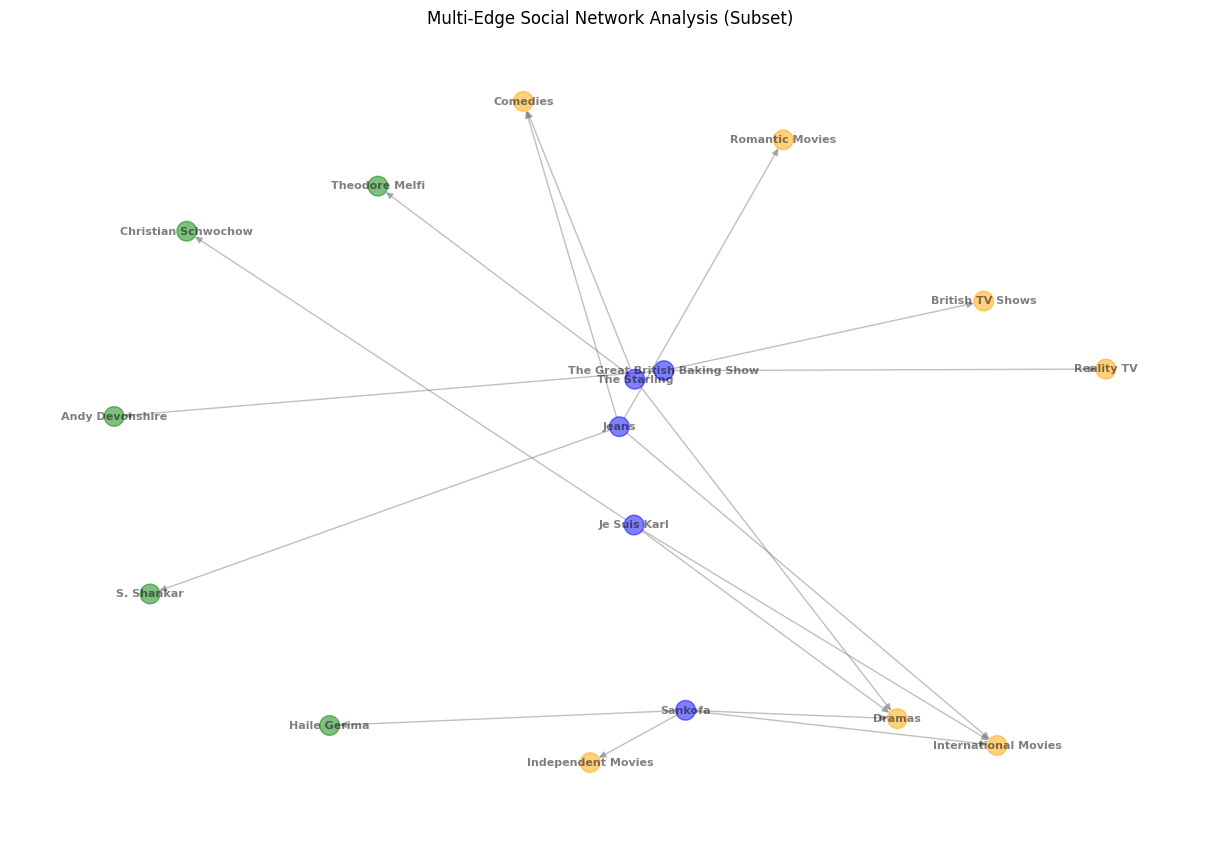

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a multi-edge directed graph
G = nx.MultiDiGraph()

# Take only the first 59 rows of the dataframe
subset_df = df.iloc[:5]

# Add nodes with attributes based on node type
for _, row in subset_df.iterrows():
    G.add_node(row['title'], node_type='Show', topic=row['topic'])
    directors = row['director'].split(', ')
    cast_members = row['listed_in'].split(', ')

    for director in directors:
        G.add_node(director, node_type='Director')
        G.add_edge(row['title'], director)

    for cast_member in cast_members:
        G.add_node(cast_member, node_type='label')
        G.add_edge(row['title'], cast_member)

# Create a DataFrame from the graph
graph_data = {'Node': list(G.nodes), 'Node Type': [G.nodes[n]['node_type'] for n in G.nodes]}
df_graphs = pd.DataFrame(graph_data)

# Print Edges Data
edges_data = {'Source': [source for source, _, _ in G.edges], 'Target': [target for _, target, _ in G.edges]}
df_edge = pd.DataFrame(edges_data)


# Display the DataFrame
print("Graph Data:")
print(df_graphs)
print("\nEdges Data:")
print(df_edge)

# Visualize the graph with multiple edges between nodes
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G)

# Define colors for different node types
node_colors = {'Show': 'blue', 'Director': 'green', 'label': 'orange'}
node_types = [G.nodes[n]['node_type'] for n in G.nodes]
edge_colors = ['gray' for _ in G.edges]

nx.draw(G, pos, with_labels=True, font_size=8, node_size=200, node_color=[node_colors[node_type] for node_type in node_types], font_color='black', font_weight='bold', edge_color=edge_colors, alpha=0.5)
plt.title('Multi-Edge Social Network Analysis (Subset)')
plt.show()


In [ ]:

# Combine nodes and edges DataFrames horizontally
df_combined = pd.concat([df_graphs, df_edge], axis=1)

# Print the combined DataFrame
print("Combined Data:")
print(df_combined)
df_combined.to_csv('combined_data.csv', index=False)

Combined Data:
                             Node Node Type                         Source  \
0                         Sankofa      Show                        Sankofa   
1                    Haile Gerima  Director                        Sankofa   
2                          Dramas     label                        Sankofa   
3              Independent Movies     label                        Sankofa   
4            International Movies     label  The Great British Baking Show   
5   The Great British Baking Show      Show  The Great British Baking Show   
6                 Andy Devonshire  Director  The Great British Baking Show   
7                British TV Shows     label                   The Starling   
8                      Reality TV     label                   The Starling   
9                    The Starling      Show                   The Starling   
10                 Theodore Melfi  Director                   Je Suis Karl   
11                       Comedies     label      

## According to Ratings


Graph Data:
                             Node Node Type
0                         Sankofa      Show
1                    Haile Gerima  Director
2                           TV-MA    rating
3   The Great British Baking Show      Show
4                 Andy Devonshire  Director
5                           TV-14    rating
6                    The Starling      Show
7                  Theodore Melfi  Director
8                           PG-13    rating
9                    Je Suis Karl      Show
10            Christian Schwochow  Director
11                          Jeans      Show
12                     S. Shankar  Director

Edges Data:
                          Source               Target
0                        Sankofa         Haile Gerima
1                        Sankofa                TV-MA
2  The Great British Baking Show      Andy Devonshire
3  The Great British Baking Show                TV-14
4                   The Starling       Theodore Melfi
5                   The Starling   

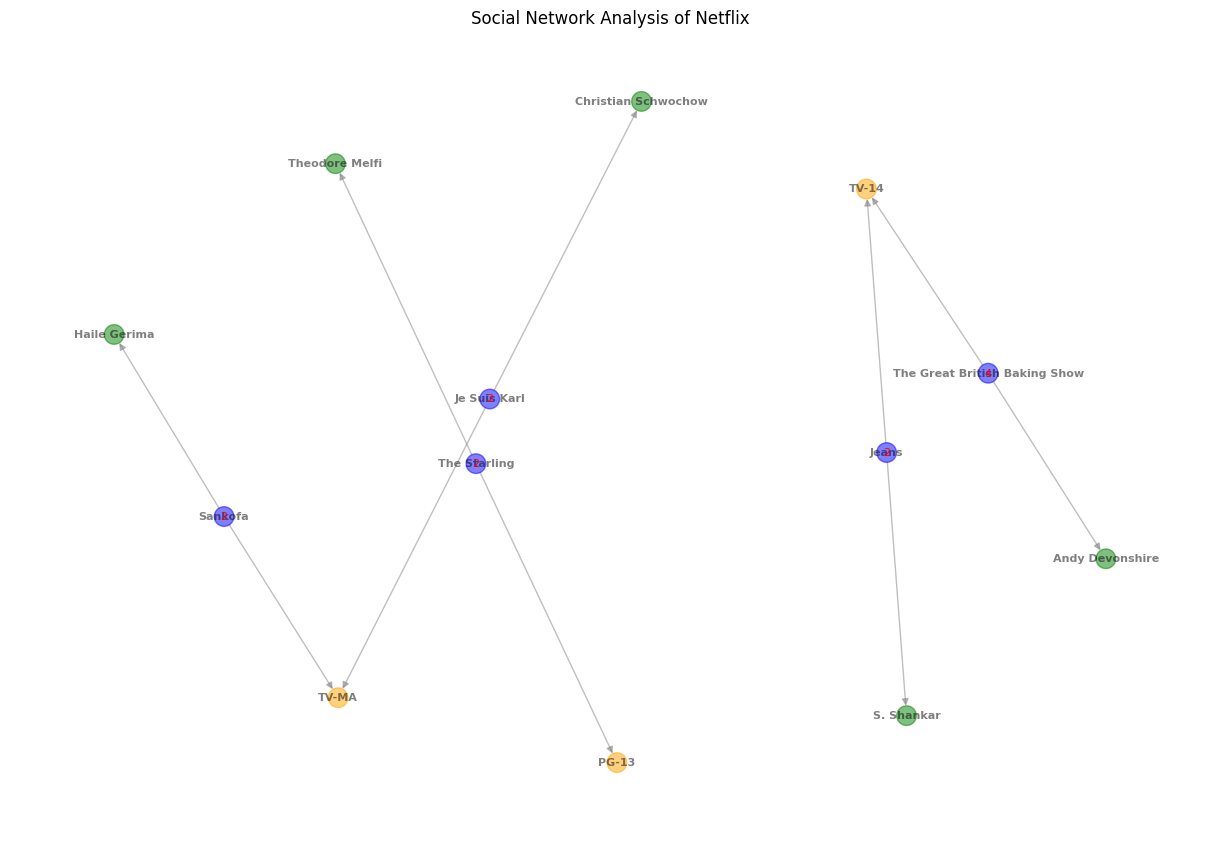

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

# Create a multi-edge directed graph
G = nx.MultiDiGraph()

# Assuming 'df' is your DataFrame containing Netflix data
# Take only the first 5 rows of the dataframe for demonstration
subset_df = df.iloc[:5]

# Add nodes with attributes based on node type
for _, row in subset_df.iterrows():
    G.add_node(row['title'], node_type='Show', topic=row['topic'])
    directors = row['director'].split(', ')
    ratings = row['rating'].split(', ')

    for director in directors:
        G.add_node(director.strip(), node_type='Director')
        G.add_edge(row['title'], director.strip())

    for rating in ratings:
        G.add_node(rating.strip(), node_type='rating')
        G.add_edge(row['title'], rating.strip())

# Create a DataFrame from the graph
graph_data = {'Node': list(G.nodes), 'Node Type': [G.nodes[n]['node_type'] for n in G.nodes]}
df_graph = pd.DataFrame(graph_data)

# Print Edges Data
edges_data = {'Source': [source for source, _, _ in G.edges], 'Target': [target for _, target, _ in G.edges]}
df_edges = pd.DataFrame(edges_data)


# Display the DataFrame
print("Graph Data:")
print(df_graph)
print("\nEdges Data:")
print(df_edges)
# Visualize the graph with multiple edges between nodes
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G)

# Define colors for different node types
node_colors = {'Show': 'blue', 'Director': 'green', 'rating': 'orange'}
node_types = [G.nodes[n]['node_type'] for n in G.nodes]
edge_colors = ['gray' for _ in G.edges]

# Draw nodes and edges with labels and attributes
nx.draw(G, pos, with_labels=True, font_size=8, node_size=200, node_color=[node_colors[node_type] for node_type in node_types], font_color='black', font_weight='bold', edge_color=edge_colors, alpha=0.5)

# Draw additional labels for topics
topic_labels = {node: G.nodes[node]['topic'] for node in G.nodes if 'topic' in G.nodes[node]}
nx.draw_networkx_labels(G, pos, labels=topic_labels, font_color='red', font_size=8)

plt.title('Social Network Analysis of Netflix')
plt.show()


In [ ]:

# Combine nodes and edges DataFrames horizontally
df_combined = pd.concat([df_graph, df_edges], axis=1)

# Print the combined DataFrame
print("Combined Data:")
print(df_combined)
df_combined.to_csv('combined_data1.csv', index=False)

Combined Data:
                             Node Node Type                         Source  \
0                         Sankofa      Show                        Sankofa   
1                    Haile Gerima  Director                        Sankofa   
2                           TV-MA    rating  The Great British Baking Show   
3   The Great British Baking Show      Show  The Great British Baking Show   
4                 Andy Devonshire  Director                   The Starling   
5                           TV-14    rating                   The Starling   
6                    The Starling      Show                   Je Suis Karl   
7                  Theodore Melfi  Director                   Je Suis Karl   
8                           PG-13    rating                          Jeans   
9                    Je Suis Karl      Show                          Jeans   
10            Christian Schwochow  Director                            NaN   
11                          Jeans      Show      

## According to Cast member

Graph Data:
                             Node Node Type
0                         Sankofa      Show
1                    Haile Gerima  Director
2                           TV-MA    rating
3   The Great British Baking Show      Show
4                 Andy Devonshire  Director
5                           TV-14    rating
6                    The Starling      Show
7                  Theodore Melfi  Director
8                           PG-13    rating
9                    Je Suis Karl      Show
10            Christian Schwochow  Director
11                          Jeans      Show
12                     S. Shankar  Director

Edges Data:
                          Source               Target
0                        Sankofa         Haile Gerima
1                        Sankofa                TV-MA
2  The Great British Baking Show      Andy Devonshire
3  The Great British Baking Show                TV-14
4                   The Starling       Theodore Melfi
5                   The Starling   

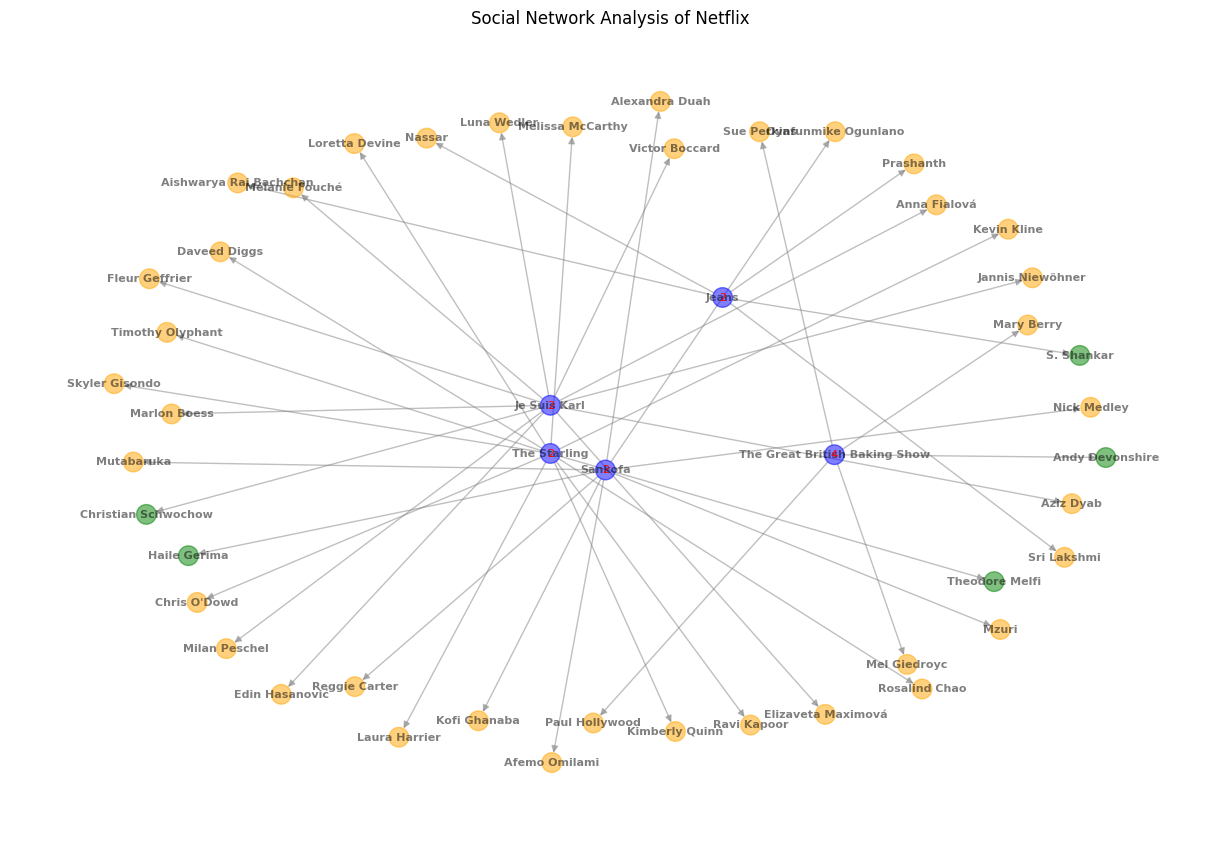

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

# Create a multi-edge directed graph
G = nx.MultiDiGraph()

# Assuming 'df' is your DataFrame containing Netflix data
# Take only the first 5 rows of the dataframe for demonstration
subset_df = df.iloc[:5]

# Add nodes with attributes based on node type
for _, row in subset_df.iterrows():
    G.add_node(row['title'], node_type='Show', topic=row['topic'])
    directors = row['director'].split(', ')
    ratings = row['cast'].split(', ')

    for director in directors:
        G.add_node(director.strip(), node_type='Director')
        G.add_edge(row['title'], director.strip())

    for rating in ratings:
        G.add_node(rating.strip(), node_type='cast')
        G.add_edge(row['title'], rating.strip())

# Create a DataFrame from the graph
graph_data = {'Node': list(G.nodes), 'Node Type': [G.nodes[n]['node_type'] for n in G.nodes]}
df_graph2 = pd.DataFrame(graph_data)

# Print Edges Data
edges_data = {'Source': [source for source, _, _ in G.edges], 'Target': [target for _, target, _ in G.edges]}
df_edges2 = pd.DataFrame(edges_data)


# Display the DataFrame
print("Graph Data:")
print(df_graph)
print("\nEdges Data:")
print(df_edges)
# Visualize the graph with multiple edges between nodes
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G)

# Define colors for different node types
node_colors = {'Show': 'blue', 'Director': 'green', 'cast': 'orange'}
node_types = [G.nodes[n]['node_type'] for n in G.nodes]
edge_colors = ['gray' for _ in G.edges]

# Draw nodes and edges with labels and attributes
nx.draw(G, pos, with_labels=True, font_size=8, node_size=200, node_color=[node_colors[node_type] for node_type in node_types], font_color='black', font_weight='bold', edge_color=edge_colors, alpha=0.5)

# Draw additional labels for topics
topic_labels = {node: G.nodes[node]['topic'] for node in G.nodes if 'topic' in G.nodes[node]}
nx.draw_networkx_labels(G, pos, labels=topic_labels, font_color='red', font_size=8)

plt.title('Social Network Analysis of Netflix')
plt.show()


In [ ]:

# Combine nodes and edges DataFrames horizontally
df_combined2 = pd.concat([df_graph2, df_edges2], axis=1)

# Print the combined DataFrame
print("Combined Data:")
print(df_combined2)
df_combined2.to_csv('combined_data2.csv', index=False)

Combined Data:
                             Node Node Type                         Source  \
0                         Sankofa      Show                        Sankofa   
1                    Haile Gerima  Director                        Sankofa   
2                    Kofi Ghanaba      cast                        Sankofa   
3             Oyafunmike Ogunlano      cast                        Sankofa   
4                  Alexandra Duah      cast                        Sankofa   
5                     Nick Medley      cast                        Sankofa   
6                      Mutabaruka      cast                        Sankofa   
7                   Afemo Omilami      cast                        Sankofa   
8                   Reggie Carter      cast                        Sankofa   
9                           Mzuri      cast  The Great British Baking Show   
10  The Great British Baking Show      Show  The Great British Baking Show   
11                Andy Devonshire  Director  The 

In [ ]:
a = df[['listed_in', 'topic', 'rating']]
a.head(20)

listed_in  topic rating
7    Dramas, Independent Movies, International Movies      2  TV-MA
8                        British TV Shows, Reality TV      4  TV-14
9                                    Comedies, Dramas      2  PG-13
12                       Dramas, International Movies      2  TV-MA
24    Comedies, International Movies, Romantic Movies      2  TV-14
27                                           Comedies      2  PG-13
28                    Horror Movies, Sci-Fi & Fantasy      3  PG-13
29                                          Thrillers      3  PG-13
38                         Action & Adventure, Dramas      4  PG-13
41         Action & Adventure, Classic Movies, Dramas      4     PG
42                   Dramas, Horror Movies, Thrillers      3     PG
43       Action & Adventure, Horror Movies, Thrillers      3     PG
44       Action & Adventure, Horror Movies, Thrillers      3  PG-13
46                                 Action & Adventure      4      R
48                                  Dramas, Thrillers      3      R
51  Action & Adventure, Anime Features, Internatio...      1  TV-14
52  Action & Adventure, Anime Features, Internatio...      1  TV-14
53  Action & Adventure, Anime Features, Internatio...      1  TV-PG
54  Action & Adventure, Anime Features, Internatio...      1  TV-PG
56  Action & Adventure, Anime Features, Internatio...      1  TV-14